In [1]:
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet101V2

from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tqdm import tqdm
import os

In [2]:
def build_model(pretrained):
    model = Sequential([
        pretrained,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    return model

# Generator

In [3]:
base_path = 'I:\AI Project\deepfake'


image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    os.path.join(base_path , 'train'),
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)




Found 100000 images belonging to 2 classes.


In [4]:
image_gen1 = ImageDataGenerator(rescale=1./255.)

valid_flow = image_gen1.flow_from_directory(
    os.path.join(base_path , 'valid'),
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.


# Train Model DenseNet   

In [5]:
densenet = DenseNet121(
    weights=None,
    include_top=False,
    input_shape=(224,224,3)
)
inception = InceptionV3(
    weights=None,
    include_top=False,
    input_shape=(224,224,3)
)
resnet = ResNet101V2(
    weights=None,
    include_top=False,
    input_shape=(224,224,3)
)

model1 = build_model(densenet)
model2 = build_model(inception)
model3 = build_model(resnet)

print(model1.summary())
print(model2.summary())
print(model3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7031232   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 7,032,257
Trainable params: 6,948,609
Non-trainable params: 83,648
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802208  
              

In [6]:
train_steps = 100000//64
valid_steps = 20000//64

history1 = model1.fit(
    train_flow,
    epochs = 10,
    steps_per_epoch =train_steps,
    validation_data =valid_flow,
    validation_steps = valid_steps
)
model1.save('densenetRegular.h5')

history2 = model2.fit(
    train_flow,
    epochs = 10,
    steps_per_epoch =train_steps,
    validation_data =valid_flow,
    validation_steps = valid_steps
)
model2.save('incpetionRegular.h5')

history3 = model3.fit(
    train_flow,
    epochs = 10,
    steps_per_epoch =train_steps,
    validation_data =valid_flow,
    validation_steps = valid_steps
)
model3.save('resnetRegular.h5')

Epoch 1/10
1562/1562 [==============================] - 1310s 833ms/step - loss: 0.5335 - accuracy: 0.7261 - val_loss: 0.6627 - val_accuracy: 0.6674
Epoch 2/10
1562/1562 [==============================] - 925s 592ms/step - loss: 0.2868 - accuracy: 0.8777 - val_loss: 1.5169 - val_accuracy: 0.5349
Epoch 3/10
1562/1562 [==============================] - 874s 560ms/step - loss: 0.1447 - accuracy: 0.9434 - val_loss: 0.2047 - val_accuracy: 0.9186
Epoch 4/10
 315/1562 [=====>........................] - ETA: 11:05 - loss: 0.0940 - accuracy: 0.9653

KeyboardInterrupt: 

# Evaluation

In [8]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [9]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

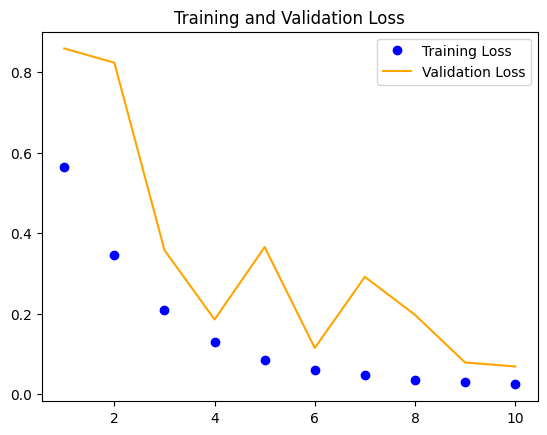

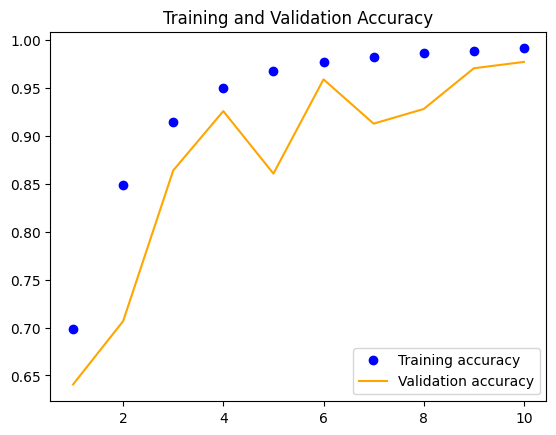

In [10]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

In [ ]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

In [ ]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)